In [27]:
import numpy as np
a=np.asarray([1,56,768,324,654,4])
b=np.asarray([True,True,True,True,False,False])
len(a[b])
# np.searchsorted(a,5)


4

In [24]:
np.searchsorted(b,5)

4

In [3]:
from math import *
def pdaP_B(B_bar,B):
    fm=(B_bar**B)*exp(-B_bar)
    # B_bar=round(B_bar)
    B=round(B)
    return fm/factorial(B)
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(1,80)
y=[]
for xx in x:
    y.append(pdaP_B(5,xx))
plt.plot(x,y)

/home/liuk/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
def genMatK(n,args):
    if len(args)<1:
        return None
    if len(args)!=n*n-n:
        return None
    matK=np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if i<j:
                matK[i,j]=args[i*(n-1)+j-1]
            elif i>j:
                matK[i,j]=args[i*(n-1)+j]
    for i in range(n):
        for j in range(n):
            if i==j:
                matK[i,j]=-np.sum(matK[:,j])
    return matK
k=genMatK(3,[1,2,3,4,5,6])
print(k)
print(k[1][0])

[[-8.  1.  2.]
 [ 3. -7.  4.]
 [ 5.  6. -6.]]
3.0


In [5]:
def genMatP(matK):
    n=matK.shape[0]
    if n<1:
        return None
    matP=np.empty([n,1])
    ap=0
    for i in range(n):
        ap+=matK[i,i]
    for i in range(n):
        matP[i,0]=matK[i,i]/ap
    return matP
a=genMatP(genMatK(3,[10,2,3,4,5,6]))

In [6]:
a

array([[ 0.26666667],
       [ 0.53333333],
       [ 0.2       ]])

In [7]:

sum(a)

array([ 1.])

In [8]:
b=np.arange(3)
b[2]

2

(array([  5284.,      0.,      0.,      0.,      0.,  10636.,      0.,
             0.,      0.,   4080.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

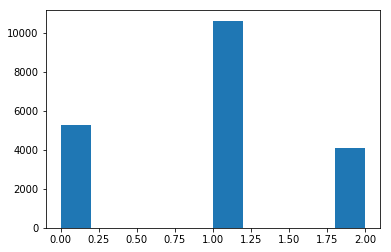

In [9]:
def drawDisIdx(idx,p):
    hight=max(idx)
    low=min(idx)
    while True:
        X = np.random.random_integers(low,hight)
        Y = np.random.uniform(0.0, 1)        
        if Y < p[X]:
            return X    
l=[]
for i in range(20000):
    l.append(drawDisIdx(b,a))
plt.hist(l)

In [10]:
def drawJ_Si2Sj(matP,i):
    P_i2j=matP
    P_i2j[i]=0
    P_i2j=P_i2j/sum(P_i2j)
    return drawDisIdx(np.arange(3),P_i2j)

In [11]:
a

array([[ 0.26666667],
       [ 0.53333333],
       [ 0.2       ]])

(array([ 336.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  664.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

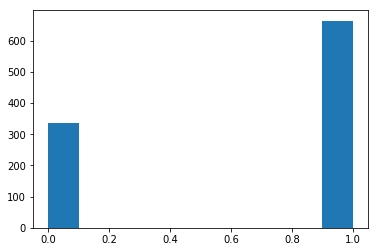

In [12]:
ll=[]
for i in range(1000):
    ll.append(drawJ_Si2Sj(a,2))
plt.hist(ll)


3.0
6.30622823413e-05


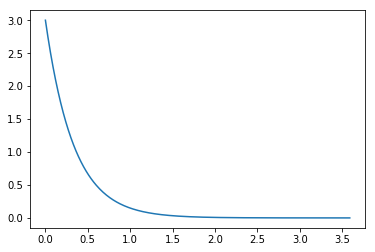

In [13]:
t=np.arange(0,k[1][0]*1.2,0.01)
print(k[1][0])
ptau=k[1][0]*np.exp(-k[1][0]*t)
plt.plot(t,ptau)
print(ptau[-1])

In [14]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [15]:
import copy
l1=[4,5]
l2=[54,7]
ll=copy.deepcopy(l1)
ll.extend(l2)
l3=ll
print(l3)

[4, 5, 54, 7]


In [16]:
type(l3) is not list

False

In [17]:
for i in range(1):
    print(i)

0


In [18]:
x=(2,6)
if x==(0):
    print ("dfs")

In [19]:
r=range(x[0],x[1])
for i in r:
    print(i)

2
3
4
5


In [20]:
len(x)

2

In [21]:
from progressbar import *
import time
progress = ProgressBar()
for i in progress(r):
    time.sleep(2)
    print(i)


 25% (1 of 4) |######                    | Elapsed Time: 0:00:02 ETA:   0:00:06

2


 50% (2 of 4) |#############             | Elapsed Time: 0:00:04 ETA:   0:00:04

3


 75% (3 of 4) |###################       | Elapsed Time: 0:00:06 ETA:   0:00:02

4


100% (4 of 4) |##########################| Elapsed Time: 0:00:08 Time:  0:00:08


5


In [22]:
l=[x for x in range(4)]
z=np.ones((1,4))
z/2

array([[ 0.5,  0.5,  0.5,  0.5]])

In [23]:
def chunks(l, n):
    """Yield successive nth chunks from l."""
    lenl=len(l)
    stack=[]
    stackList=[]
    for i in range(0, lenl, lenl//n):
        stack.append(l[i:i + lenl//n])
    for i in range(n):
        stackList.append([stack[i]])
    if len(stack)>n:
        for i in range(n,len(stack)):
            stackList[i-n].append(stack[i])
    for i in range(0, n):
        yield stackList.pop()
ll=list(chunks(range(0,10), 3))        
print(ll[1])

[range(3, 6)]


In [24]:
from multiprocessing import Pool
class c:
    def __init__(self):
        pass
    def f(self,x):
        l=[x for x in range(x)]
        return l

    def ca(self):
        with Pool(processes=4) as pool:         # start 4 worker processes
            result = pool.apply_async(self.f, (10,)) # evaluate "f(10)" asynchronously
            print(result.get(timeout=1))        # prints "100" unless your computer is *very* slow
            result = pool.map(self.f, range(3,10))
            r=result#.get()
            print(r)       # prints "[0, 1, 4,..., 81]"
c1=c()
c1.ca()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [25]:
n_states=2
xmin = [0.001]*n_states
xmink=[0.1]*(n_states*n_states-n_states)
xmin.extend(xmink)
xmax = [0.999]*n_states
xmaxk=[9000]*(n_states*n_states-n_states)
xmax.extend(xmaxk)
bounds = [(low, high) for low, high in zip(xmin, xmax)]
print(bounds)

[(0.001, 0.999), (0.001, 0.999), (0.1, 9000), (0.1, 9000)]


In [26]:
import numpy as np 
s=0.1
x=[1,34,5,6657,768]

x[0:2]=x[0:2]+ np.random.uniform(-2.*s, 2.*s,2)

In [27]:
x[0]

1.0311739543803959

In [28]:
np.random.uniform(-2.*s, 2.*s,2)

array([ 0.06541475, -0.02214654])

In [29]:
x=[0.2,0.3,111,3345]
low=np.zeros(4)
hi=np.zeros(4)
for i in range(len(x)):
    low[i]=x[i]-bounds[i][0]
    hi[i]=bounds[i][1]-x[i]
print(low,hi)

[  1.99000000e-01   2.99000000e-01   1.10900000e+02   3.34490000e+03] [  7.99000000e-01   6.99000000e-01   8.88900000e+03   5.65500000e+03]


In [30]:
x+np.random.uniform(low,hi)

array([  6.75973545e-01,   7.29131192e-01,   3.83547362e+02,
         7.93675601e+03])

In [31]:
import logging
import logging.handlers
import os
 
handler = logging.handlers.WatchedFileHandler(
    os.environ.get("LOGFILE", "./yourapp.log"))
formatter = logging.Formatter(logging.BASIC_FORMAT)
handler.setFormatter(formatter)
root = logging.getLogger()
root.setLevel(os.environ.get("LOGLEVEL", "INFO"))
root.addHandler(handler)
 
try:
    exit(main())
except Exception:
    logging.exception("Exception in main()")
    exit(1)

In [32]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins, n_samples):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)


In [94]:
from scipy.stats import binom
n, p = 10, 1-.000000000000000000000000000000000000000000000000000000000000000000000000000000001
r = binom.rvs(n, p, size=1)
print(r)

[10]


In [103]:
n=np.arange(9)
np.where((n>3) & (n<7))[0][0]

4

In [35]:
pk = np.zeros((7,1))
pk[1]=0.1
pk[2]=0.3
pk[3]=0.1
pk[4]=0.4
pk[6]=0.1
sum(pk)

array([ 1.])

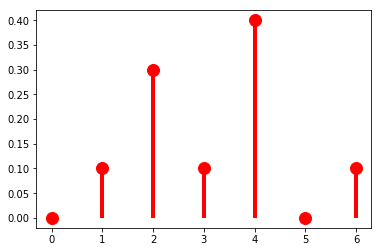

In [36]:
from scipy import stats
xk = np.arange(7)

custm = stats.rv_discrete(name='custm', values=(xk, pk))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

In [37]:
np.arange(1)+1>0

array([ True], dtype=bool)

In [38]:
k=[2,2]
rk=10**np.asarray(k)

In [39]:
[np.log10(rk)]

[array([ 2.,  2.])]

In [40]:
10**2.3443546

220.98082977416328

In [41]:
ii=3
[(i+1)**2 for i in range(ii)]

[1, 4, 9]

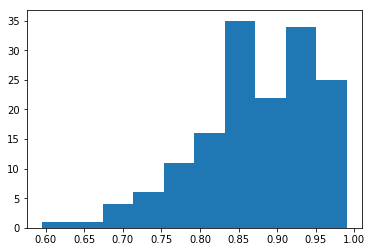

In [42]:
r = stats.norm.rvs(loc=0.9,scale=0.1,size=200)
rr=r[np.where((r>0.01) &(  r< 0.99))]
plt.hist(rr,10)
plt.show()

/home/liuk/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib64/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/liuk/.local/lib64/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/liuk/.local/lib64/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/liuk/.local/lib64/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/liuk/.

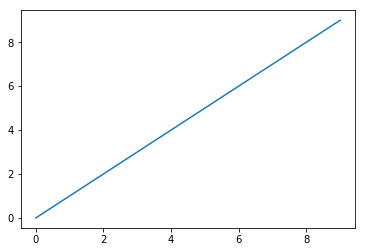

In [43]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

plt.plot(range(10))
plt.savefig('temp.png')